In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import folium 
%matplotlib inline

In [3]:
# Choose a domain
domain = 'BEAU'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'
# stream gage data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# ET data
etpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/'
# datapath
datapath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'
# prec ctl file
ctlFilePREC = SMpath+'ctl_files/wo_assim/prec_base.ctl'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# DATES
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

In [3]:
# # open modified et file
# ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'

# et = open_CtlDataset(ctlFile)
# et

In [4]:
# # load ET data 
# # historical ET data - domain
# EThist_path = '/nfs/attic/dfh/2020_NPRB/data/climate_na_et/Normal_1991_2020_monthly/'+domain+'/historic_daily_et.nc'
# climatena = xr.open_dataset(EThist_path)
# #convert mm to m 
# et_m = climatena.et/1000
# # set all pixels to 0 where it is undefined in SM
# climatena['et_m'] = et_m
# climatena

In [4]:
# load station discharge data
path=gagepath+domain+'_discharge_cfs_'+st_dt+'_'+ed_dt+'.csv'
Q = pd.read_csv(path,parse_dates=['datetimeUTC'],infer_datetime_format=True,index_col='datetimeUTC')
Q

,USGS:15803000:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15905100:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,
2011-10-01 00:00:00+00:00,500.0,7450.0,800.0,160.0,840.0,750.0,25.0,124.0
2011-10-02 00:00:00+00:00,400.0,6900.0,600.0,160.0,900.0,770.0,20.0,112.0
2011-10-03 00:00:00+00:00,280.0,6340.0,650.0,150.0,820.0,730.0,18.0,103.0
2011-10-04 00:00:00+00:00,240.0,5000.0,500.0,150.0,720.0,660.0,17.0,121.0
2011-10-05 00:00:00+00:00,260.0,3800.0,400.0,140.0,680.0,600.0,16.0,108.0
...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,712.0,8750.0,4150.0,319.0,2440.0,NaN,NaN,237.0
2018-09-27 00:00:00+00:00,758.0,8180.0,3970.0,340.0,2720.0,NaN,NaN,215.0
2018-09-28 00:00:00+00:00,777.0,7840.0,3630.0,262.0,2590.0,NaN,NaN,227.0


In [5]:
# load station metadata
path=gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson'
meta=gpd.read_file(path)
meta

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15803000,MEADE R AT ATKASUK AK,ST,702945.0,1572333.0,70.495376,-157.395848,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-129053.158 2282397.475)
1,USGS,15875000,COLVILLE R AT UMIAT AK,ST,692137.8,1520721.7,69.360500,-152.122694,Y,D,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (74884.972 2155626.519)
2,USGS,15896000,KUPARUK R NR DEADHORSE AK,ST,701654.0,1485735.0,70.281385,-148.962786,M,T,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (193105.171 2263000.626)
3,USGS,15905100,ATIGUN R BL GALBRAITH LK NR PUMP STATION 4 AK,ST,682708.0,1492224.0,68.452222,-149.373333,Y,S,...,None,None,None,None,None,None,None,None,None,POINT (191402.544 2061090.423)
4,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (209493.473 2124788.351)
5,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,None,Y,None,None,None,None,None,None,None,POINT (296437.161 2228856.346)
6,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,None,Y,None,None,None,None,None,None,None,POINT (327399.685 2230767.193)
7,USGS,15980000,HULAHULA R NR KAKTOVIK AK,ST,694214.0,1441154.0,69.703686,-144.201089,M,S,...,C,None,None,None,None,None,None,None,None,POINT (383962.332 2220680.218)


In [6]:
# #only need to do this for BEAU
# # 10 largest stations 
# # sort stations by upslope area
# stnmeta = meta.sort_values('drain_area_va',ascending = False)
# # select 10 largest stations
# stnmeta = stnmeta[0:10]
# # sort stations by station id area
# stnmeta = stnmeta.sort_values('site_no')
# # reset index
# stnmeta = stnmeta.reset_index(drop=True)
# # new station list
# stn_list = stnmeta.site_no.tolist()
# stn_list
# stnmeta

In [7]:
# load upslope watershed area masks
upslope = xr.open_dataset(gagepath+'upslope.nc')
upslope

<xarray.Dataset>
Dimensions:      (y: 496, x: 1298)
Coordinates:
    band         int64 ...
  * y            (y) float64 2.456e+06 2.454e+06 ... 1.962e+06 1.96e+06
  * x            (x) float64 -5.425e+05 -5.415e+05 ... 7.535e+05 7.545e+05
    spatial_ref  int64 ...
Data variables: (12/15)
    15798700     (y, x) float32 ...
    15803000     (y, x) float32 ...
    15820000     (y, x) float32 ...
    15860000     (y, x) float32 ...
    15861000     (y, x) float32 ...
    15862500     (y, x) float32 ...
    ...           ...
    15905100     (y, x) float32 ...
    15906000     (y, x) float32 ...
    15908000     (y, x) float32 ...
    15955000     (y, x) float32 ...
    15960000     (y, x) float32 ...
    15980000     (y, x) float32 ...

In [8]:
# station data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# all domains have the same start date
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

stn = gpd.read_file(gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson')

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

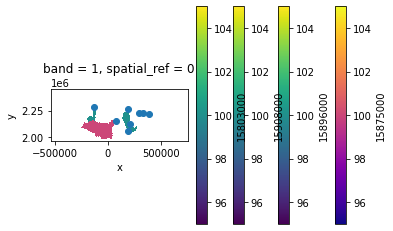

In [10]:
fig, ax = plt.subplots()
upslope['15875000'].plot(ax=ax,cmap='plasma')
upslope['15896000'].plot(ax=ax)
upslope['15908000'].plot(ax=ax)
upslope['15803000'].plot(ax=ax)
stn.plot(ax=ax)


In [9]:
# a step before this notebook in QGIS:
# determine which watershed will be used to calculate the prec cf
#BEAU
stn_list = ['15875000','15896000','15908000','15803000']

### calculate weighted precip correction factor

In [11]:
# start_years_list = list(range(2001,2018))
# end_years_list = list(range(2003,2020))
start_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+2,int(ed_dt[:4])+1))



specPs = np.empty([len(start_years_list),len(stn_list)])
specQs = np.empty([len(start_years_list),len(stn_list)])
specETs = np.empty([len(start_years_list),len(stn_list)])
Pcfs = np.empty([len(start_years_list),len(stn_list)])
numpixs = []

# prec data
P = open_CtlDataset(ctlFilePREC)
# P = P.rename({'lon': 'x', 'lat': 'y'})

# open modified et file
ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'
ET = open_CtlDataset(ctlFile)

for g in range(len(stn_list)):
    gage = stn_list[g]
    print(gage)
    #calculate number of pixels in upslope
    numpix = int(upslope[gage].where(upslope[gage]==100).count())
    numpixs.append(numpix)
    #         # calculate upslpe area
    #         wshedA=numpix*1000*1000
    # watershed area area
    wshedA=meta.drain_area_va[meta.site_no==gage].values[0]*2.59e6
    #print('ratio',wshedA/(numpix*1000*1000))
    for y in range(len(start_years_list)):
        styr = start_years_list[y]
        edyr = end_years_list[y]
        print('wy = ',edyr)

        # station name
        stn = 'USGS:'+gage+':00060:00003'
        # stn Q
        stnQ = Q[stn][str(styr)+'-10-01' :str(edyr)+'-09-30']
        if len(stnQ[stnQ.isnull()])/len(stnQ)>.1:
            print('missing more than 10% of days')
            specPs[y,g]=np.nan
            specQs[y,g]=np.nan
            specETs[y,g]=np.nan
            Pcfs[y,g]=np.nan
            continue
        else:
            # convert stn units of cfs to m^3/d
            stnq = stnQ*60*60*24/35.3147
            # prec data
            p = P.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            p['mask'] = (['lat', 'lon'],  np.flipud(upslope[gage].values))
            # specific precipitation
            psum = p.prec.sum(dim='time')
            specP=np.nansum(psum.where((p.mask==100)&(psum>0)).values)/numpix
            specPs[y,g]=specP
            #et data
            et = ET.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            et['mask'] = (['lat', 'lon'],  np.flipud(upslope[gage].values))
            # specific precipitation
            etsum = et.etx.sum(dim='time')
            specET=np.nansum(etsum.where((et.mask==100)&(etsum>0)).values)/numpix
            specETs[y,g]=specET
            # specific discharge 
            specQ=stnq.sum()/wshedA
            specQs[y,g]=specQ
            # # specific ET
            # et_tot = climatena.et_m.sum(dim='time')
            # specET = et_tot.where(climatena.mask==1).sum().values/numpix
            # specETs[y,g]=specET
            # correction factor 
            Pcfs[y,g]=(specQ+specET)/specP
            # Pcfs[y,g]=specQ/specP
            print('specP',specP)
            print('specQ',specQ)
            print('specET',specET)


15875000
wy =  2013
specP 0.42658928011374786
specQ 0.2615149213452065
specET 0.12937925492259117
wy =  2014
specP 0.538965202387794
specQ 0.33986659940319874
specET 0.1559374375805977
wy =  2015
specP 0.4476693525991001
specQ 0.2580921035389005
specET 0.09910827450213408
wy =  2016
specP 0.42654974782561467
specQ 0.2907139251898961
specET 0.12750756260337529
wy =  2017
specP 0.4235354929862493
specQ 0.24789834416307246
specET 0.13203859523054443
wy =  2018
specP 0.505857841891873
specQ 0.3065368510637963
specET 0.14237639808510413
15896000
wy =  2013
specP 0.47477298092532466
specQ 0.2502955064220751
specET 0.1330553579499336
wy =  2014
specP 0.525862534127804
specQ 0.28164920820892536
specET 0.13945948072701447
wy =  2015
specP 0.4739271359854634
specQ 0.22240806149947884
specET 0.10184385982004501
wy =  2016
specP 0.5112886359024498
specQ 0.21206585515058507
specET 0.13911751090706168
wy =  2017
specP 0.4692692960448642
specQ 0.19550856766028765
specET 0.13118905131622638
wy =  2018

In [13]:
# 15875000
# specific discharge based on stream stats
drainageAmi=13860
drainageAkm = drainageAmi*2.59
drainageAm = drainageAkm*1e6
MAP = 16/39.37 #in to m 
Qdaily_cfs = 10000 #[cfs]
Qdaily_cms = Qdaily_cfs/35.3147
specq = Qdaily_cms*60*60*24*365/drainageAm
MAP,specq,specq/MAP

(0.40640081280162565, 0.24876432070684237, 0.612115706639274)

In [15]:
# dataframe of stations with correction factors for each year
df = pd.DataFrame(Pcfs,columns = stn_list)
df

,15875000,15896000,15908000,15803000
0,0.916324,0.807440,1.054436,0.710885
1,0.919918,0.800796,0.933466,0.606135
2,0.797911,0.684181,0.897444,0.637415
3,0.980475,0.686859,0.902845,0.504553
4,0.897060,0.696184,0.964668,0.533452
5,0.887430,0.734072,1.227085,0.638175


In [16]:
# data frame with mean cfs and weight
newdf = pd.DataFrame(list(zip(stn_list,df.median().values,numpixs)),columns=['stn','cf','numpix'])
# drop stations with nan cf
newdf=newdf[~newdf.cf.isnull()]
newdf['wt']= newdf.numpix/newdf.numpix.sum()
newdf

,stn,cf,numpix,wt
0,15875000,0.906692,35671,0.669777
1,15896000,0.715128,8470,0.159037
2,15908000,0.949067,4146,0.077847
3,15803000,0.621775,4971,0.093338


In [17]:
newdf.to_csv(datapath + domain+'_precCF_'+st_dt+'_'+ed_dt+'_cfsv2.csv')

In [18]:
# calculate weighted correction factor
np.nansum(newdf.cf*newdf.wt)

0.8529316554221722

### calc cf for largest watershed

In [44]:
#find station with the largest upslope area
stn_list = meta.site_no.tolist()
count = []
for stn in stn_list:
    count.append(upslope[stn].where(upslope[stn]==100).count().values.tolist())
    
gage = np.array(stn_list)[count==np.max(count)][0]
gage

'15744500'

In [45]:
# et data 
modis['mask'] = upslope[gage]
modis

<xarray.Dataset>
Dimensions:      (wy: 18, y: 798, x: 763)
Coordinates:
  * wy           (wy) int64 2002 2003 2004 2005 2006 ... 2016 2017 2018 2019
  * y            (y) float64 2.158e+06 2.158e+06 ... 1.362e+06 1.362e+06
  * x            (x) float64 -7.435e+05 -7.425e+05 ... 1.75e+04 1.85e+04
    band         int64 1
    spatial_ref  int64 0
Data variables:
    modisET      (wy, y, x) float64 ...
    mask         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [46]:
#calculate number of pixels in upslope
numpix = int(modis.mask.where(modis.mask==100).count())
# calculate upslpe area
wshedA=int(modis.mask.where(modis.mask==100).count())*1000*1000
numpix,wshedA

(22459, 22459000000)

In [47]:
start_years_list = list(range(int(st_dt[:4]),int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])+1))

specPs = []
specQs = []
specETs = []
Pcfs = []

for y in range(len(start_years_list)):
    styr = start_years_list[y]
    edyr = end_years_list[y]
    print(edyr)

    # station name
    stn = stn = 'USGS:'+gage+':00060:00003'
    # stn Q
    stnQ = Q[stn][str(styr+1)+'-09-01' :str(edyr)+'-08-31']
    # convert stn units of cfs to m^3/d
    stnq = stnQ*60*60*24/35.3147
    # prec data
    p = open_CtlDataset(ctlFilePREC)
    #add upslope mask
    p['mask']=(['lat', 'lon'],  np.flipud(upslope[gage].values))
    # specific precipitation
    specP=np.nansum(p.prec.sum(dim='time').where(p.mask==100).values)/numpix
    specPs.append(specP)
    # specific discharge 
    specQ=stnq.sum()/wshedA
    specQs.append(specQ)
    # specific ET
    specET = np.nansum(modis.modisET.sel(wy = edyr).where(modis.mask==100).values)/numpix
    specETs.append(specET)
    # correction factor 
    Pcfs.append(specP/(specQ+specET))

2010
2011
2012
2013
2014


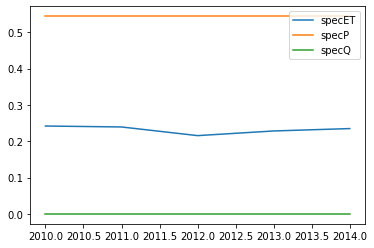

In [48]:
plt.plot(end_years_list,specETs,label ='specET')
plt.plot(end_years_list,specPs,label ='specP')
plt.plot(end_years_list,specQs,label ='specQ')
plt.legend()

In [49]:
# save correction factors 
df = pd.DataFrame(list(zip(end_years_list,Pcfs)),columns = ['wy','cf'])
df

,wy,cf
0,2010,2.248797
1,2011,2.273335
2,2012,2.524710
3,2013,2.382887
4,2014,2.316220


(2.3491896778308075, 2.3162199086237214)

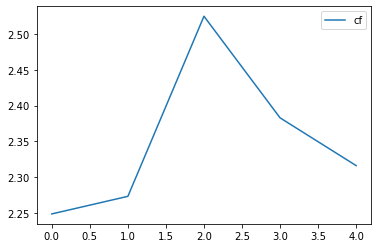

In [50]:
df.cf.plot(label = 'cf',legend=True)
df.cf.mean(),df.cf.median()

In [51]:
df.to_csv(datapath+'prec_cf_wy'+st_dt[:4]+'_'+ed_dt[:4]+'.csv')